# Test 1

In [14]:
from DataManipulation.DataHandler import  mergeMonths, DemaMinDayMultinom

import pandas as pd
from torch.utils.data import ConcatDataset
#data = mergePeriod(1,4,beg="DAT_ASCII_EURUSD_M1_2021",dir="./eurusd2021/",dump=False)
data2021 = mergeMonths(start=1, end=5,beg="DAT_ASCII_EURUSD_M1_2021",dir = './Data/eurusd2021/', dump=True)

dir = "./Data/"
beg = "DAT_ASCII_EURUSD_M1_"
year = 2020
data2020 = pd.read_csv(dir+beg+str(year)+'.csv',sep=';',names = ['Open','High','Low','Close','Volume']) 
year = 2019
data2019 = pd.read_csv(dir+beg+str(year)+'.csv',sep=';',names = ['Open','High','Low','Close','Volume']) 

data = pd.concat([data2019,data2020,data2021])
data.index.name = "Date"
data.index = pd.to_datetime(data.index)

dc = data.copy()
emaperiods = [60*2,60*3,60*5,60*7,60*24*100,60*24*200]
dataset = DemaMinDayMultinom(dc,emaperiods = emaperiods)
print([x.__name__ for x in dataset.indicators])
validEntries = dataset.raw.dropna()
predictorNames = dataset.periodDiffNames #[x.__name__+"D1" for x in dataset.indicators]+[x.__name__+"D2" for x in dataset.indicators]
ResponseName = "_y_enter_exit"

['dema9', 'ema120', 'ema180', 'ema300', 'ema420', 'ema144000', 'ema288000']


1021384
43200


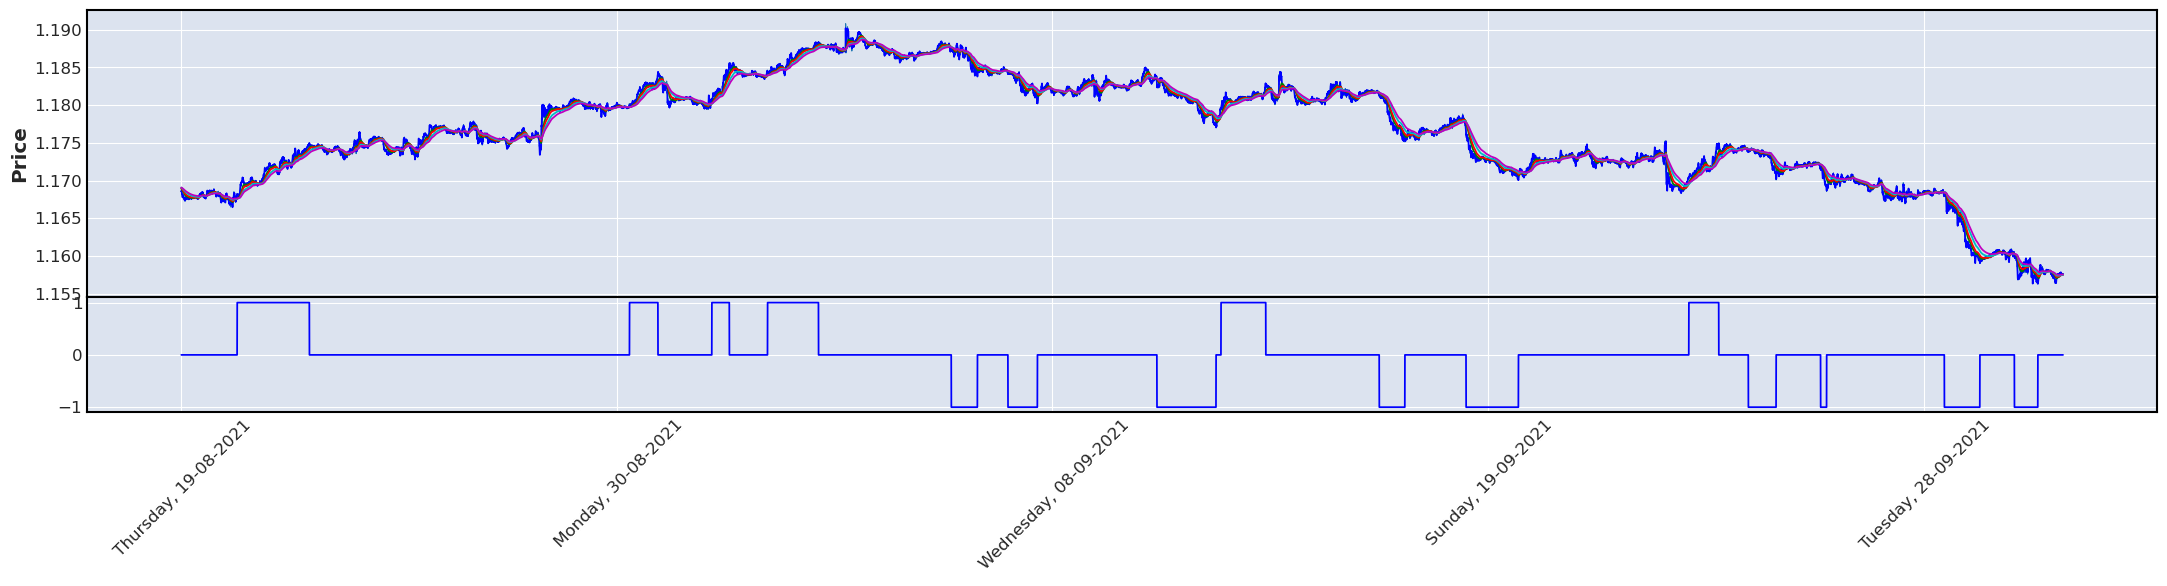

In [17]:
import mplfinance as mpf

df = dataset.raw.iloc[-60*24*30:]
colors = ['b','g','r','c','m','y','k','w']
print(len(dataset.raw))
print(len(df))
import numpy as np
apds = [
        mpf.make_addplot(df[dataset.indicators[i].__name__],panel=0,color=colors[i])
        for i in range(len(dataset.indicators)-2)
    #] + [
    #    mpf.make_addplot(df['ema120']-df['ema180'],panel=1,color='b'),
    #    mpf.make_addplot(df['ema180']-df['ema300'],panel=1,color='g'),
    #] + [
    #    mpf.make_addplot(np.sign(df['ema120']-df['ema420']),panel=2,color='b'),
    ] + [
        mpf.make_addplot(df['_y_enter_exit'],panel=1,color='b'),    
    ]

# fig, axes = mpf.plot(df,addplot=apds,figscale=14,volume=False, returnfig=True)
fig, axes = mpf.plot(df,type = 'line', figratio=(250,50),datetime_format=' %A, %d-%m-%Y',volume=False, returnfig=True,addplot=apds)#addplot=apds,figratio=(10,5),volume=False, returnfig=True)

In [19]:
fullx = validEntries[predictorNames].to_numpy()*10**5
fully = validEntries[ResponseName].to_numpy()

#windoweddataset = dataset.generateTrainingPair()
print(time()-t)

597.3728940486908


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(fullx, fully, test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(solver='saga')#'liblinear')
logisticRegr.fit(x_train, y_train)

/home/sean/miniconda3/envs/trade/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(solver='saga')

In [21]:
y_pred =  logisticRegr.predict(x_test)
print(len(y_pred[y_pred==0]))
print(len(y_pred))
print(len(y_pred[y_pred==y_test]))

124497
183346
134193


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, logisticRegr.predict(x_test) ))
print(confusion_matrix(y_train, logisticRegr.predict(x_train) ))
print(accuracy_score(y_test, logisticRegr.predict(x_test)))
print(accuracy_score(y_train, logisticRegr.predict(x_train)))

[[15329 13387     1]
 [ 9911 97758 12498]
 [    4 13352 21106]]
[[ 45978  40445      7]
 [ 29552 292864  36773]
 [     8  40464  63945]]
0.7319112497681979
0.7322920681555389


In [46]:
import numpy as np
def predictWrap(x_set,model):
    y_prob = model.predict_proba(x_set)

    y_set = np.zeros(shape=(y_prob.shape[0],))
    for i in range(len(y_set)): 
        y_set[i] = 0 if y_prob[i,1]>0.2 else np.argmax(y_prob[i])-1
    return y_set
y_train_predict_wrap = predictWrap(x_train,logisticRegr)

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, logisticRegr.predict(x_test) ))
print(confusion_matrix(y_train, logisticRegr.predict(x_train) ))
print(confusion_matrix(y_train, y_train_predict_wrap ))

#print(accuracy_score(y_test, logisticRegr.predict(x_test)))
#print(accuracy_score(y_train, logisticRegr.predict(x_train)))

[[15329 13387     1]
 [ 9911 97758 12498]
 [    4 13352 21106]]
[[ 45978  40445      7]
 [ 29552 292864  36773]
 [     8  40464  63945]]
[[ 10756  75674      0]
 [  3253 350800   5136]
 [     0  88943  15474]]


In [42]:
logisticRegr.classes_

array([-1.,  0.,  1.])

In [26]:
from DataManipulation.DataHandler import DemaMinDayMultinom, mergeMonths
import pandas as pd
from torch.utils.data import ConcatDataset
#data = mergePeriod(1,4,beg="DAT_ASCII_EURUSD_M1_2021",dir="./eurusd2021/",dump=False)
testdata = mergeMonths(start=6, end=9,beg="DAT_ASCII_EURUSD_M1_2021",dir = './Data/eurusd2021/', dump=True)

testdata.index.name = "Date"
testdata.index = pd.to_datetime(testdata.index)

from time import time
t = time()
testdc = testdata.copy()
testdataset = DemaMinDayMultinom(testdc)

print([x.__name__ for x in testdataset.indicators])
testvalidEntries = dataset.raw.dropna()


['dema9', 'ema100', 'ema200', 'ema300', 'ema144000', 'ema288000']


In [49]:
testfullx = testvalidEntries[predictorNames].to_numpy()*10**5
testfully = testvalidEntries[ResponseName].to_numpy()
testfully_predict_label =  logisticRegr.predict(testfullx)
testfully_predict_prob  =  logisticRegr.predict_proba(testfullx)
testfully_predict_label_wrap = predictWrap(testfullx, logisticRegr)
import numpy as np
def acc_class(y_true,y_lab, label):
    idx = np.where(y_true==label)
    predicts = y_lab[idx]
    return np.sum(predicts == label)/len(predicts)
def predict_prob_false_summary(y_true,y_lab,y_prob,label):
    idx = np.where(y_true==label)
    true_lab = y_true[idx]
    predicts = y_lab[idx]
    probs    = y_prob[idx]
    wrong_idx = np.where(true_lab != predicts)
    wrong_probs = probs[wrong_idx]
    #print(wrong_probs)
    return wrong_probs
    
for l in logisticRegr.classes_:
    print(acc_class(testfully,testfully_predict_label,l))


for l in logisticRegr.classes_:
    print(acc_class(y_train,logisticRegr.predict(x_train),l))

wrong_probs = predict_prob_false_summary(testfully, testfully_predict_label, testfully_predict_prob, 0)
print(np.apply_along_axis(np.max,axis=0,arr=wrong_probs))
print(np.apply_along_axis(np.min,axis=0,arr=wrong_probs))

def prob_based_y(y_probs):
    np.app

0.5324237713531399
0.8148891429334357
0.6124108036492198
0.5319680666435266
0.8153479087611257
0.6124002796479501
[0.99996742 0.48739321 0.997981  ]
[1.06984325e-06 3.25768365e-05 8.24629039e-11]


In [30]:
testfullx.shape

(733382, 7)

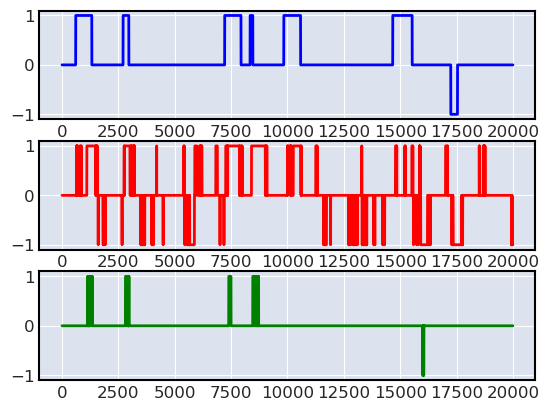

In [50]:
import matplotlib.pyplot as plt

fig, (ax0, ax1, ax3) = plt.subplots(3, 1)

ax0.plot(testfully[:20000], color = 'b')
ax1.plot(testfully_predict_label[:20000],color = 'r')
ax3.plot(testfully_predict_label_wrap[:20000],color = 'g')

In [37]:
#import numpy as np
#for c in logisticRegr.classes_:
#    idx = np.where(testfully,c)
#    
#    preds = test_y_pred[idx]
#    row = [preds/]
#    print([x/len(testfully[testfully==c]) for x in row])
from sklearn.metrics import confusion_matrix
print(confusion_matrix(testfully, test_y_pred))
print(confusion_matrix(y_train, logisticRegr.predict(x_train) ))
print(confusion_matrix(y_test , logisticRegr.predict(x_test) ))


[[ 7719 10338     0]
 [ 4116 77884  3616]
 [    0  8049  9372]]
[[ 5774  7725     0]
 [ 3068 58449  2685]
 [    0  6081  7038]]
[[ 1945  2613     0]
 [ 1048 19435   931]
 [    0  1968  2334]]


# Test 2 (logistic + D1)


In [51]:
from DataManipulation.DataHandler import  mergeMonths, DemaMinDayMultinom

import pandas as pd
from torch.utils.data import ConcatDataset
#data = mergePeriod(1,4,beg="DAT_ASCII_EURUSD_M1_2021",dir="./eurusd2021/",dump=False)
data2021 = mergeMonths(start=1, end=5,beg="DAT_ASCII_EURUSD_M1_2021",dir = './Data/eurusd2021/', dump=True)

dir = "./Data/"
beg = "DAT_ASCII_EURUSD_M1_"
year = 2020
data2020 = pd.read_csv(dir+beg+str(year)+'.csv',sep=';',names = ['Open','High','Low','Close','Volume']) 
year = 2019
data2019 = pd.read_csv(dir+beg+str(year)+'.csv',sep=';',names = ['Open','High','Low','Close','Volume']) 

data = pd.concat([data2019,data2020,data2021])
data.index.name = "Date"
data.index = pd.to_datetime(data.index)

dc = data.copy()
emaperiods = [60*2,60*3,60*5,60*7,60*24*100,60*24*200]
dataset = DemaMinDayMultinom(dc,emaperiods = emaperiods)
print([x.__name__ for x in dataset.indicators])
validEntries = dataset.raw.dropna()
#predictorNames = dataset.periodDiffNames #[x.__name__+"D1" for x in dataset.indicators]+[x.__name__+"D2" for x in dataset.indicators]
ResponseName = "_y_enter_exit"

predictorNames = dataset.periodDiffNames+ dataset.gradientDiffNames

fullx = validEntries[predictorNames].to_numpy()*10**5
fully = validEntries[ResponseName].to_numpy()

#windoweddataset = dataset.generateTrainingPair()
print(time()-t)

['dema9', 'ema120', 'ema180', 'ema300', 'ema420', 'ema144000', 'ema288000']
70844.8958902359


In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(fullx, fully, test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(solver='saga',max_iter=1000)#'liblinear')
logisticRegr.fit(x_train, y_train)

/home/sean/miniconda3/envs/trade/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(max_iter=1000, solver='saga')

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, logisticRegr.predict(x_test) ))
print(confusion_matrix(y_train, logisticRegr.predict(x_train) ))
print(accuracy_score(y_test, logisticRegr.predict(x_test)))
print(accuracy_score(y_train, logisticRegr.predict(x_train)))

[[13789 10126     5]
 [11165 73441 12671]
 [    2 10700 20179]]
[[ 41105  30601     38]
 [ 33246 220589  37814]
 [     9  32489  60341]]
0.7062757269296019
0.7058579845341844


In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, logisticRegr.predict(x_test) ))
print(confusion_matrix(y_train, logisticRegr.predict(x_train) ))
print(confusion_matrix(y_train, predictWrap(x_train, logisticRegr) ))

print(accuracy_score(y_test, logisticRegr.predict(x_test)))
print(accuracy_score(y_train, logisticRegr.predict(x_train)))
print(accuracy_score(y_train, predictWrap(x_train, logisticRegr)))

[[ 9784 14136     0]
 [ 4295 86460  6522]
 [    0 15381 15500]]
[[ 29133  42611      0]
 [ 12849 259105  19695]
 [     2  46255  46582]]
[[ 11835  59909      0]
 [  4049 282261   5339]
 [     0  74310  18529]]
0.7347808361498704
0.7338810079082572
0.6852325132827158


In [58]:
from DataManipulation.DataHandler import DemaMinDayMultinom, mergeMonths
import pandas as pd
from torch.utils.data import ConcatDataset
#data = mergePeriod(1,4,beg="DAT_ASCII_EURUSD_M1_2021",dir="./eurusd2021/",dump=False)
testdata = mergeMonths(start=6, end=9,beg="DAT_ASCII_EURUSD_M1_2021",dir = './Data/eurusd2021/', dump=True)

testdata.index.name = "Date"
testdata.index = pd.to_datetime(testdata.index)

from time import time
t = time()
testdc = testdata.copy()
testdataset = DemaMinDayMultinom(testdc)

print([x.__name__ for x in testdataset.indicators])
testvalidEntries = dataset.raw.dropna()


testfullx = testvalidEntries[predictorNames].to_numpy()*10**5
testfully = testvalidEntries[ResponseName].to_numpy()
testfully_predict_label =  logisticRegr.predict(testfullx)
testfully_predict_prob  =  logisticRegr.predict_proba(testfullx)
testfully_predict_label_wrap = predictWrap(testfullx, logisticRegr)
import numpy as np
def acc_class(y_true,y_lab, label):
    idx = np.where(y_true==label)
    predicts = y_lab[idx]
    return np.sum(predicts == label)/len(predicts)
def predict_prob_false_summary(y_true,y_lab,y_prob,label):
    idx = np.where(y_true==label)
    true_lab = y_true[idx]
    predicts = y_lab[idx]
    probs    = y_prob[idx]
    wrong_idx = np.where(true_lab != predicts)
    wrong_probs = probs[wrong_idx]
    #print(wrong_probs)
    return wrong_probs
    
for l in logisticRegr.classes_:
    print(acc_class(testfully,testfully_predict_label,l))


for l in logisticRegr.classes_:
    print(acc_class(y_train,logisticRegr.predict(x_train),l))

wrong_probs = predict_prob_false_summary(testfully, testfully_predict_label, testfully_predict_prob, 0)
print(np.apply_along_axis(np.max,axis=0,arr=wrong_probs))
print(np.apply_along_axis(np.min,axis=0,arr=wrong_probs))

def prob_based_y(y_probs):
    np.app

['dema9', 'ema100', 'ema200', 'ema300', 'ema144000', 'ema288000']
0.40680924903830074
0.8885109249574469
0.5017943743937925
0.4060688001784121
0.8884138124937854
0.5017503419898965
[0.9999999  0.49877234 0.99981388]
[2.90047002e-10 9.50365717e-08 4.39464964e-17]


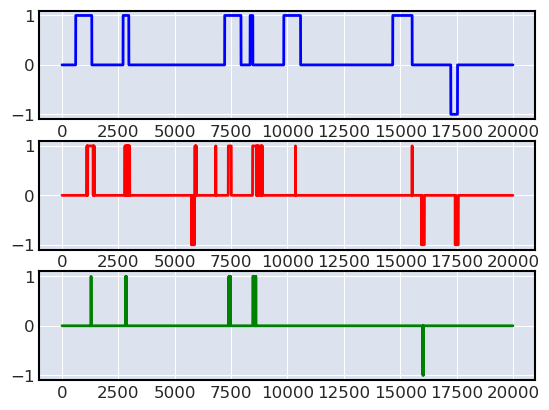

In [59]:
import matplotlib.pyplot as plt

fig, (ax0, ax1, ax3) = plt.subplots(3, 1)

ax0.plot(testfully[:20000], color = 'b')
ax1.plot(testfully_predict_label[:20000],color = 'r')
ax3.plot(testfully_predict_label_wrap[:20000],color = 'g')

In [75]:
import numpy as np
def evalIndicatorN(price, proposed_support):
    # proposed_support has to be +1,0,-1

    sign = 0
    startidx = -1
    peak = -1
    peakidx = -1
    
    diff = 0 
    
    supportzonecount = 0
    for i in range(len(proposed_support)) :
        #sign change
        if np.sign(proposed_support[i])!=sign:
            # was it previously inside a zone last i
            if sign != 0:
                if startidx>=0:
                    supportzonecount += 1
                    diff += (peak-price[startidx])*sign
                startidx = i
                peak = price[i]
                peakidx = i
        if startidx != i and startidx!=-1:
            if (price[i]-peak)*sign>0:
                peak = price[i]
                peakidx = i
        sign = np.sign(proposed_support[i])
    return supportzonecount,diff

In [82]:
#testfullx.shape
count,totaldiff =  evalIndicatorN(testvalidEntries['Close'], testfully_predict_label_wrap)
print(count, testdataset.zonecount,testdataset.bigzonecount)
print(totaldiff/10**5)


2429 43 798
2.9920000000000052e-05


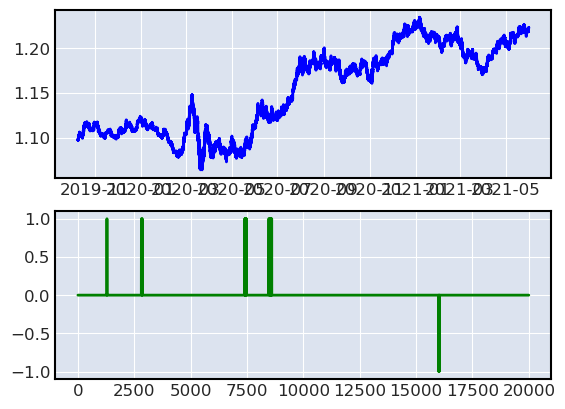

In [83]:
import matplotlib.pyplot as plt

fig, (ax0, ax1) = plt.subplots(2, 1)

ax0.plot(testvalidEntries['Close'], color = 'b')
#ax1.plot(testfully_predict_label[:20000],color = 'r')
ax1.plot(testfully_predict_label_wrap[:20000],color = 'g')